### Polygon Python Client - WebSocket & RESTful APIs

Documentation:
- [polygon.io](https://polygon.io/)
- [polygon.io@GitHub](https://github.com/polygon-io/client-python)
- [timestamp to date](https://stackoverflow.com/questions/34386751/pandas-convert-timestamp-to-datetime-date)

In [1]:
# !pip install polygon-api-client -q

In [2]:
# !python --version

In [3]:
from polygon import RESTClient
from config import API_KEY

import pandas as pd
import matplotlib.pyplot as plt
import time

In [4]:
def get_ticker_info(ticker, timespan="day", from_="2023-01-01", to="2023-02-28"):
    '''
    Requires a stock's ticker sign in order to obtain its info as an aggregate of
    lists. Converts the list aggregates into a Pandas DataFrame object.
    Creates a new 'date' column (e.g., '2023-01-03') from the 'timestamp'
    (e.g., '1677560400000').
    '''
    
    # Instantiate the polygon.io RESTful object as client
    client = RESTClient(api_key=API_KEY)
    
    # List aggregate bars (info) for the input stock ticker
    info = client.get_aggs(ticker=ticker,
                           multiplier=1,
                           timespan=timespan,
                           from_=from_,
                           to=to,
                          )
    
    # Convert the list aggregates into a Pandas DataFrame
    df = pd.DataFrame(info)
    
    # Create the date column from the timestamp column
    day_divider = 86400000 # 24h * 60m * 60s * 1000ms
    df['date'] = (df['timestamp']/day_divider).values.astype(dtype='datetime64[D]')

    return df

In [5]:
# import inspect
# inspect.signature(get_ticker_info)

In [6]:
# TSLA = get_ticker_info("TSLA", 'day', '2023-02-01')
TSLA = get_ticker_info("TSLA")
AAPL = get_ticker_info("AAPL")
ADBE = get_ticker_info("ADBE")
AMZN = get_ticker_info("AMZN")
MSFT = get_ticker_info("MSFT")

In [7]:
TSLA["date"][:5]

0   2023-01-03
1   2023-01-04
2   2023-01-05
3   2023-01-06
4   2023-01-09
Name: date, dtype: datetime64[ns]

In [8]:
# # Plot using Pandas plot method
# TSLA.plot(x="time", 
#          y="close",
#          kind="line",
#          title="Tesla Stock Price in Q1 2023",
#          xlabel="Date",
#          ylabel="Price ($)",
#         );

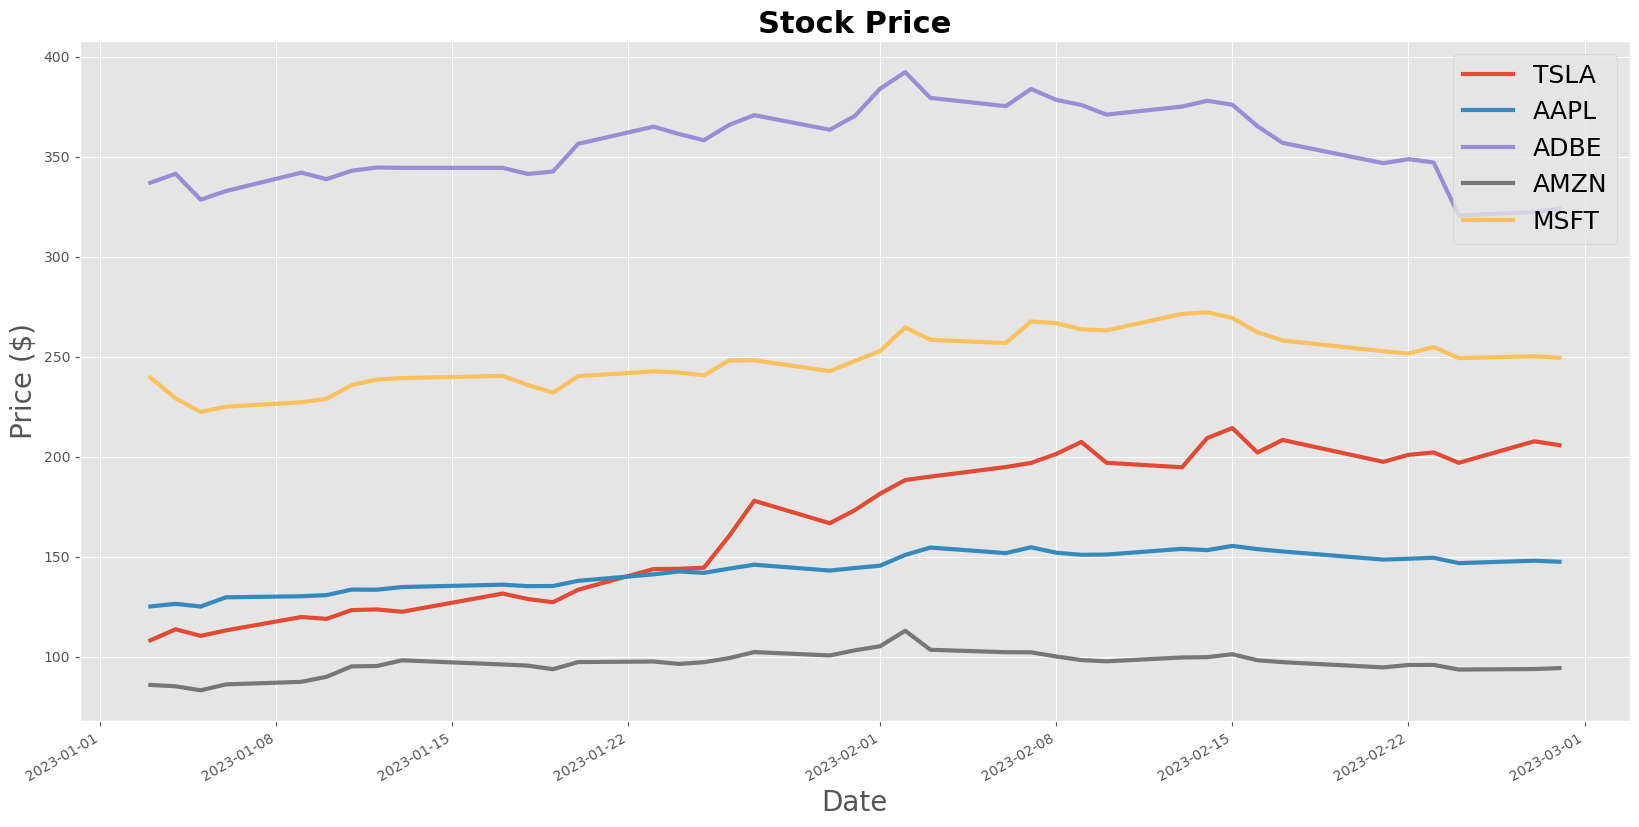

In [9]:
# Plot using Matplotlib OO plot method
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(20,10))


def plot_ticker_info(ticker):
    ticker.plot.line(ax=ax,
                     x='date',
                     y='close', 
                     linewidth= 3,
                     linestyle='-',
                    )


plot_ticker_info(TSLA)
plot_ticker_info(AAPL)
plot_ticker_info(ADBE)
plot_ticker_info(AMZN)
plot_ticker_info(MSFT)

ax.set_title('Stock Price', 
             fontsize=22, 
             fontweight='heavy',
            )
ax.set_ylabel('Price ($)',
              fontsize=20,
             )
ax.set_xlabel('Date',
              fontsize=20,
             )
ax.legend([
            "TSLA",
            "AAPL",
            "ADBE",
            "AMZN",
            "MSFT",
        ],
        fontsize=18,
)

plt.show()

In [10]:
t = time.gmtime()
timestamp = time.strftime('%Y-%b-%d_%H%M', t)
chart_name = ("StockPrice_" + timestamp + ".png")

fig.savefig(chart_name)